In [2]:
# importing libraries
import numpy as np
from skimage import color
from skimage.transform import rescale
from matplotlib import image
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [3]:
import glob
import os

Faces =[]
Ages = []
Genders = []
# Visualize some examples of resize image
for k,i in enumerate(glob.glob(r"FaceData/*")):
    
    # load image
    imagei = image.imread(i)
#     print("age:",os.path.basename(i).split("_")[0])
#     print("gender:",os.path.basename(i).split("_")[1]) #male 0, female 1
    Ages.append(os.path.basename(i).split("_")[0])
    Genders.append(os.path.basename(i).split("_")[1])
    
    # Convert to grayscale images
    imagei = color.rgb2gray(imagei)
    
    # Resize image
    image_rescaled = rescale(imagei, 0.25, anti_aliasing=False)

    # Visualize them
#     plt.figure()
#     plt.imshow(image_rescaled, cmap='gray')
#     plt.show()
    
    Faces.append(image_rescaled.flatten())
    
  

In [4]:
D_input = np.array(Faces).astype(float)
print(D_input.shape)
y_age = np.array(Ages).astype(float)/100
y_gender = np.array(Genders).astype(float)*2-1

(9780, 2500)


In [4]:
y_gender

array([1., 1., 1., ..., 1., 1., 1.])

## Please use exactly the same train_test_split

In [5]:
#data processing for question 4 

In [5]:
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(D_input, y_age, y_gender, test_size=0.1, random_state=205) 


In [6]:
X_train_mean = np.mean(X_train,axis=0)[None,:]
X_train_mean

array([[0.37778933, 0.36969226, 0.36817558, ..., 0.44057508, 0.44102552,
        0.44177759]])

In [7]:
# Demean
X_train_demean = X_train - X_train_mean
X_test_demean = X_test - X_train_mean

In [9]:
#linear regression model for question 4 for age 

In [39]:
# using pure numpy

Lambda = 0

#turn into a column vector


#prepare D,y
D = X_train_demean
print(X_train_demean.shape)
y= y_age_train

W_age = (np.linalg.inv(D.T@D+ Lambda*np.eye(D.shape[1])))@D.T@y 
print(W_age)

(8802, 2500)
[ 0.05666668  0.05385523  0.00196861 ...  0.04703858 -0.02063229
  0.01792949]


In [46]:
y_pred = X_train_demean @ W_age

print(y_pred.shape)

(8802,)


In [12]:
y_pred_test = X_test_demean @ W_age

print(mean_squared_error(y_age_test, y_pred_test))

0.12587291908546455


In [13]:
#for genders

In [74]:
Lambda = 0


#prepare D,y
D = X_train_demean
y= y_gender_train

W_gender = (np.linalg.inv(D.T@D+ Lambda*np.eye(D.shape[1])))@D.T@y 
print(W_gender.shape)

(2500,)


In [16]:
y_pred = X_train_demean @ W_gender

print(y_pred)

[-0.00880807 -0.0158224  -0.46706356 ...  0.40202402  0.51019782
 -1.18216349]


In [17]:
y_pred_test = X_test_demean @ W_gender

print(y_gender_test>0,y_pred_test>0)
print(y_gender_test,y_pred_test)
print("Accuracy:",np.sum(np.sign(y_gender_test)==np.sign(y_pred_test))/y_gender_test.shape[0])

[False False  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True False False False False False  True  True
  True  True  True False  True False  True False  True  True False  True
 False False  True  True  True  True False False False False False  True
 False False  True False  True  True  True  True  True  True  True False
 False  True  True  True  True  True False  True  True False False  True
  True False False False  True False  True  True False  True False  True
 False  True False  True  True False  True  True  True False False  True
 False  True False False False False  True False False  True  True False
 False False  True  True  True  True False False  True  True False False
  True  True False  True False  True  True False  True  True False  True
 False  True  True  True  True False False  True  True False  True  True
 False  True False False False  True  True  True False  True False  True
  True False  True  True  True False  True False Fa

In [18]:
# additional processing of data for question 5 

In [8]:
Q, s, PT = np.linalg.svd(X_train_demean)

e_values_sq = s/X_train.shape[0]**0.5
print(e_values_sq)

[5.84903151e+00 3.70135201e+00 3.60847354e+00 ... 4.36417949e-03
 4.20392383e-03 4.06654266e-03]


In [9]:
X_train_whitten = X_train_demean@PT.T@np.linalg.inv(np.diag(e_values_sq))
X_test_whitten = X_test_demean@PT.T@np.linalg.inv(np.diag(e_values_sq))
print(X_train_whitten.shape)

(8802, 2500)


In [49]:
print(sum(e_values_sq))
per = 0
for k in range(len(e_values_sq)): 
    per += e_values_sq[k]
    if per/sum(e_values_sq) > 0.98:
        print(k)
        break
k = 2115
X_train_whitten_reduced = X_train_demean@PT.T[:,:k]@np.linalg.inv(np.diag(e_values_sq[:k]))
X_test_whitten_reduced = X_test_demean@PT.T[:,:k]@np.linalg.inv(np.diag(e_values_sq[:k]))

164.10759799924602
2115


In [23]:
#rerun the model again with new data for the model (question 5, age)

In [50]:
# using pure numpy

Lambda = 0

#turn into a column vector


#prepare D,y
D = X_train_whitten_reduced
y= y_age_train

W_age_svd = (np.linalg.inv(D.T@D+ Lambda*np.eye(D.shape[1])))@D.T@y 


In [51]:
y_pred = X_train_whitten_reduced @ W_age_svd

print(y_pred)

[-0.03487709  0.24903807 -0.00437382 ... -0.30342263 -0.42713506
  0.45961241]


In [52]:
y_pred_test = X_test_whitten_reduced @ W_age_svd

print(mean_squared_error(y_age_test, y_pred_test))

0.12071068556114099


In [72]:
Lambda = 0

#turn into a column vector


#prepare D,y
D = X_train_whitten_reduced
y= y_gender_train

W_gender_svd = (np.linalg.inv(D.T@D+ Lambda*np.eye(D.shape[1])))@D.T@y 


(2115,)


In [55]:
y_pred = X_train_whitten_reduced @ W_gender_svd

print(y_pred)

[-0.14284544  0.11910801 -0.4311744  ...  0.52402275  0.51992755
 -1.21785496]


In [56]:
y_pred_test = X_test_whitten_reduced @ W_gender_svd

print(y_gender_test>0,y_pred_test>0)
print(y_gender_test,y_pred_test)
print("Accuracy:",np.sum(np.sign(y_gender_test)==np.sign(y_pred_test))/y_gender_test.shape[0])

[False False  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True False False False False False  True  True
  True  True  True False  True False  True False  True  True False  True
 False False  True  True  True  True False False False False False  True
 False False  True False  True  True  True  True  True  True  True False
 False  True  True  True  True  True False  True  True False False  True
  True False False False  True False  True  True False  True False  True
 False  True False  True  True False  True  True  True False False  True
 False  True False False False False  True False False  True  True False
 False False  True  True  True  True False False  True  True False False
  True  True False  True False  True  True False  True  True False  True
 False  True  True  True  True False False  True  True False  True  True
 False  True False False False  True  True  True False  True False  True
  True False  True  True  True False  True False Fa

In [ ]:
#sgd age 

In [57]:
X_train = X_train_whitten_reduced
y_train = y_age_train

neuron_in_hidden_layer = 2 # number of hidden neuron in the hidden layer

W_hidden = np.random.randn(neuron_in_hidden_layer,X_train_whitten_reduced.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer


def predict(X, W_hidden,W_output):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01

for e in range(20):# for each epoch
    for i in range(X_train.shape[0]):
        x_i = X_train_whitten_reduced[i:i+1]
        y_i = y_train[i]
        
        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i
        
        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T
        
        # Gradient Descent rule
        W_output = W_output -  learning_rate*Gradient_output

        
        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
        
        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
        # Gradient Descent rule
        W_hidden = W_hidden -  learning_rate * Gradient_hidden
    
    
    y_pred,_,_ = predict(X_train_whitten_reduced, W_hidden,W_output)
    print(mean_squared_error(y_train,y_pred))
    

0.02124874021707011
0.01651723143106149
0.015291991641965305
0.014580053672894364
0.013987712291748023
0.013453047110268394
0.012950196872010943
0.01247684886354118
0.012036531174800953
0.011631695212638963
0.011261554150587431
0.01092513336320589
0.010620337531105252
0.010344265290954812
0.010093814499967903
0.009866195397893325
0.009659177227140488
0.009470820017038709
0.009299278593434088
0.009142805226512632


In [58]:
y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)

result_SGD = (mean_squared_error(y_age_test,y_pred_test) )
          
print("Mean squared error:"+ str(result_SGD))

Mean squared error:0.028584431408269675


In [59]:
X_train = X_train_whitten_reduced
y_train = y_gender_train

neuron_in_hidden_layer = 2 # number of hidden neuron in the hidden layer

W_hidden = np.random.randn(neuron_in_hidden_layer,X_train.shape[1]+1)

W_output = np.random.randn(1,neuron_in_hidden_layer+1)


def predict(X, W_hidden,W_output):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01

for e in range(200):# for each epoch
    for i in range(X_train.shape[0]):
        x_i = X_train[i:i+1]
        y_i = y_train[i]
        
        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i
        
        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T
        
        # Gradient Descent rule
        W_output = W_output -  learning_rate*Gradient_output

        
        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
        
        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
        # Gradient Descent rule
        W_hidden = W_hidden -  learning_rate * Gradient_hidden
    
    
    y_pred,_,_ = predict(X_train, W_hidden,W_output)
    print(y_train>0,y_pred[:,0]>0)
    print(y_train,y_pred[:,0])
    print("Accuracy:",np.sum(np.sign(y_train)==np.sign(y_pred[:,0]))/y_train.shape[0])

[ True False False ...  True  True False] [ True  True  True ...  True  True  True]
[ 1. -1. -1. ...  1.  1. -1.] [0.10562551 0.10562553 0.10579119 ... 0.14177745 0.10717806 0.14177748]
Accuracy: 0.5530561236082708
[ True False False ...  True  True False] [ True  True  True ...  True  True  True]
[ 1. -1. -1. ...  1.  1. -1.] [0.10850651 0.10850653 0.10869817 ... 0.15162707 0.09968988 0.15162692]
Accuracy: 0.5530561236082708
[ True False False ...  True  True False] [ True  True  True ...  True  True  True]
[ 1. -1. -1. ...  1.  1. -1.] [0.11140662 0.11140665 0.11161926 ... 0.16101452 0.09244772 0.16101422]
Accuracy: 0.5530561236082708
[ True False False ...  True  True False] [ True  True  True ...  True  True  True]
[ 1. -1. -1. ...  1.  1. -1.] [0.11377454 0.11377458 0.11401388 ... 0.1693424  0.08574159 0.16934199]
Accuracy: 0.5530561236082708
[ True False False ...  True  True False] [ True  True  True ...  True  True  True]
[ 1. -1. -1. ...  1.  1. -1.] [0.11479328 0.11479333 0.1

[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.14227949  0.14228065  0.14243558 ...  0.32350138 -0.07760772
  0.32350134]
Accuracy: 0.5686207680072711
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.14239621  0.14239729  0.14254514 ...  0.32491405 -0.07894541
  0.32491401]
Accuracy: 0.5697568734378551
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.14260317  0.14260422  0.14273833 ...  0.3263653  -0.080279
  0.32636526]
Accuracy: 0.5704385366962054
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.14296634  0.14296737  0.14308904 ...  0.32797459 -0.08170824
  0.32797456]
Accuracy: 0.5711201999545558
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] 

[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.13978873  0.13978903  0.13983925 ...  0.39222053 -0.14661219
  0.39222042]
Accuracy: 0.5900931606453079
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.13855045  0.13855077  0.13859766 ...  0.39427457 -0.14908634
  0.39427446]
Accuracy: 0.591002044989775
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.13626079  0.13626115  0.13630517 ...  0.3962941  -0.15187977
  0.39629399]
Accuracy: 0.5916837082481254
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.13450462  0.13450501  0.13454673 ...  0.39804768 -0.15492449
  0.39804757]
Accuracy: 0.5922517609634174
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.]

[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.12170863  0.1217104   0.12170504 ...  0.43053757 -0.20582561
  0.43053737]
Accuracy: 0.603612815269257
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.12120516  0.12120677  0.12120114 ...  0.43104143 -0.20636863
  0.43104123]
Accuracy: 0.6038400363553738
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.12089019  0.12089176  0.12088536 ...  0.43156931 -0.2069255
  0.4315691 ]
Accuracy: 0.604180867984549
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.12058158  0.12058336  0.12057569 ...  0.43244526 -0.20778597
  0.43244503]
Accuracy: 0.6044080890706658
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [

[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.11082534  0.11083462  0.11074073 ...  0.45068295 -0.23606343
  0.45068258]
Accuracy: 0.615655532833447
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.1107478   0.11075735  0.11065768 ...  0.4512453  -0.2369076
  0.45124487]
Accuracy: 0.6158827539195637
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.11053437  0.11054406  0.1104383  ...  0.4520001  -0.23829474
  0.45199959]
Accuracy: 0.6163371960917973
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.1099474   0.10995707  0.10984566 ...  0.45353681 -0.24122775
  0.45353625]
Accuracy: 0.6165644171779141
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] 

[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.11206657  0.11208249  0.1120436  ...  0.47224648 -0.27170199
  0.47224305]
Accuracy: 0.6246307657350603
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.11186874  0.11188493  0.11184588 ...  0.47245993 -0.27210431
  0.47245575]
Accuracy: 0.6247443762781186
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.11167827  0.11169492  0.11165462 ...  0.47260934 -0.27249655
  0.47260442]
Accuracy: 0.6251988184503522
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.] [ 0.11143692  0.11145391  0.11141283 ...  0.47271762 -0.27293856
  0.47271233]
Accuracy: 0.6253124289934106
[ True False False ...  True  True False] [ True  True  True ...  True False  True]
[ 1. -1. -1. ...  1.  1. -1.

In [1]:
#ADAM

In [ ]:
X_train = X_train_whitten_reduced
print(X_train_whitten_reduced.shape)
y_train = y_gender_train

neuron_in_hidden_layer = 10 # number of hidden neuron in the hidden layer

W_hidden = np.random.randn(neuron_in_hidden_layer,X_train.shape[1]+1)

W_output = np.random.randn(1,neuron_in_hidden_layer+1)

rho = 0.999
rho_f = 0.9
A = np.zeros([1,11])
F = np.zeros([1,11])


small_value = 1e-8
A_hidden = np.zeros([10,2116])
F_hidden = np.zeros([10,X_train.shape[1]+1])
def predict(X, W_hidden,W_output):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01

for e in range(200):# for each epoch
    for i in range(X_train.shape[0]):
        x_i = X_train[i:i+1]
        
        y_i = y_train[i]
        
        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i
        
        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T
        

        A = (rho)*A + (1-rho)*(Gradient_output)**2
    
        F = rho_f*F + (1-rho_f)*(Gradient_output)
    
        alpha = learning_rate*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
    
        
        # Gradient Descent rule
        W_output = W_output -  alpha*F/np.sqrt(A+small_value)

        
        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
        
        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
        # Gradient Descent rule
        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
    
        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
    
    
        W_hidden = W_hidden -  alpha * F_hidden/np.sqrt(A_hidden + small_value)
    
    
    y_pred,_,_ = predict(X_train, W_hidden,W_output)
    print(y_train>0,y_pred[:,0]>0)
    print(y_train,y_pred[:,0])
    print("Accuracy:",np.sum(np.sign(y_train)==np.sign(y_pred[:,0]))/y_train.shape[0])

In [23]:

y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)
print(y_gender_test>0,y_pred_test[:,0]>0)
print(y_gender_test,y_pred_test[:,0])
print("Accuracy:",np.sum(np.sign(y_gender_test)==np.sign(y_pred_test[:,0]))/y_gender_test.shape[0])

[False False  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True False False False False False  True  True
  True  True  True False  True False  True False  True  True False  True
 False False  True  True  True  True False False False False False  True
 False False  True False  True  True  True  True  True  True  True False
 False  True  True  True  True  True False  True  True False False  True
  True False False False  True False  True  True False  True False  True
 False  True False  True  True False  True  True  True False False  True
 False  True False False False False  True False False  True  True False
 False False  True  True  True  True False False  True  True False False
  True  True False  True False  True  True False  True  True False  True
 False  True  True  True  True False False  True  True False  True  True
 False  True False False False  True  True  True False  True False  True
  True False  True  True  True False  True False Fa

In [31]:
X_train = X_train_whitten_reduced
y_train = y_age_train

neuron_in_hidden_layer = 2 # number of hidden neuron in the hidden layer

W_hidden = np.random.randn(neuron_in_hidden_layer,X_train_whitten_reduced.shape[1]+1)/k

W_output = np.random.randn(1,neuron_in_hidden_layer+1)/neuron_in_hidden_layer


rho = 0.999
rho_f = 0.9
A = np.zeros([1,3])
F = np.zeros([1,3])


small_value = 1e-8
A_hidden = np.zeros([2,4])
F_hidden = np.zeros([2,4])
def predict(X, W_hidden,W_output):
    
    y_pred = []
    for i in range(X.shape[0]):
        x_i = X[i:i+1]
        x_i_1 = np.hstack([x_i,[[1]]])
        x_h_i = sigmoid(W_hidden@x_i_1.T)
        x_h_i_1 = np.vstack([x_h_i,[1]])
        x_o = W_output@x_h_i_1
        y_pred.append([x_o[0][0]])
        
    return np.array(y_pred),x_h_i_1,x_i_1


def sigmoid(y):
    return 1/(1+np.exp(-y))

learning_rate = 0.01

for e in range(20):# for each epoch
    for i in range(X_train.shape[0]):
        x_i = X_train_whitten_reduced[i:i+1]
        y_i = y_train[i]
        
        y_pred_i,x_h_i_1,x_i_1 = predict(x_i, W_hidden,W_output)

        delta_k = y_i - y_pred_i
        
        #Gradient for output layer
        Gradient_output  = -delta_k*x_h_i_1.T
        A = (rho)*A + (1-rho)*(Gradient_output)**2
    
        F = rho_f*F + (1-rho_f)*(Gradient_output)
    
        alpha = learning_rate*(np.sqrt(1-rho**(i+1)))/(1-rho_f**(i+1))
    
        
        # Gradient Descent rule
        W_output = W_output -  alpha*F/np.sqrt(A+small_value)

        
        delta_h = x_h_i_1*(1-x_h_i_1)*W_output.T*delta_k
        
        # Update each hidden unit
        Gradient_hidden = np.zeros_like(W_hidden)
        for h in range(W_hidden.shape[0]):
            
            #Gradient for hidden layer
            Gradient_hidden[h,:] =  - delta_h[h] * x_i_1
            
        # Gradient Descent rule
        A_hidden = (rho)*A_hidden + (1-rho)*(Gradient_hidden)**2
    
        F_hidden = rho_f*F_hidden + (1-rho_f)*(Gradient_hidden)
    
    
        W_hidden = W_hidden -  alpha * F_hidden/np.sqrt(A_hidden + small_value)
    
    
    
    y_pred,_,_ = predict(X_train_whitten_reduced, W_hidden,W_output)
    print(mean_squared_error(y_train,y_pred))
    

0.05993723651464879
0.0597169616685387
0.059682418652946045
0.0596760020373952
0.059673685001326734
0.059672397236431106
0.05967170429273333
0.0596714116035745
0.0596713705477389
0.05967147861378127
0.05967167115656236
0.05967190880477299
0.05967216771511644
0.0596724334021339
0.05967269707771411
0.059672953494765583
0.05967319965119136
0.05967343398687975
0.05967365587081544
0.05967386526534794


In [33]:
y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)

result_SGD = (mean_squared_error(y_age_test,y_pred_test) )
          
print("Mean squared error:"+ str(result_SGD))

Mean squared error:0.05902394528451402


## Please test your model using the face images of all team members

In [ ]:
#face images of all members

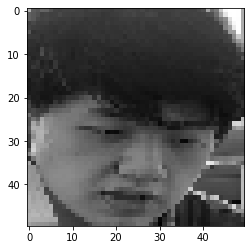

C:\Users\User\AppData\Local\Temp/ipykernel_12492/3164669700.py:17: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  imagei = color.rgb2gray(imagei)


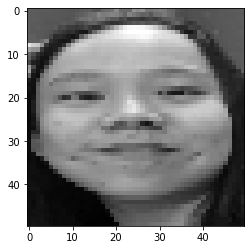

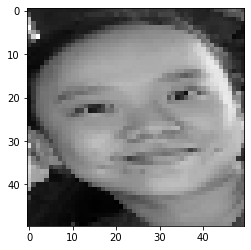

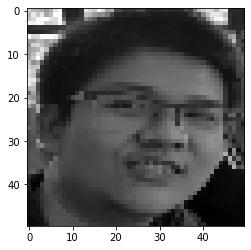

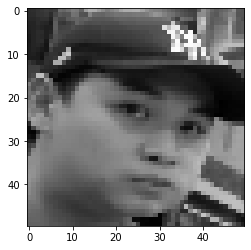

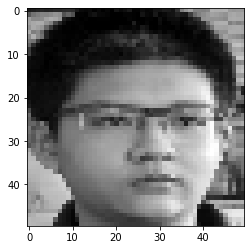

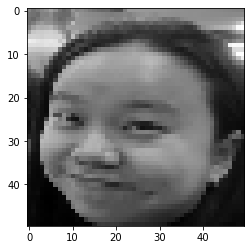

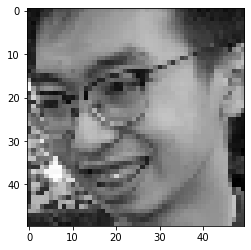

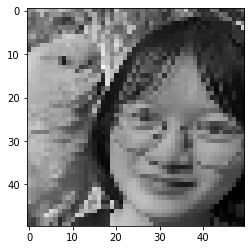

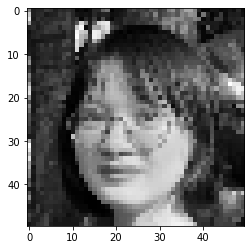

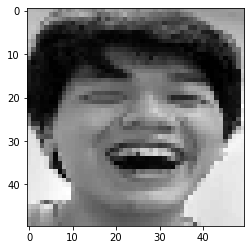

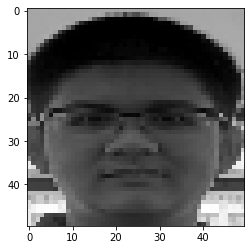

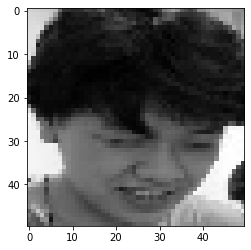

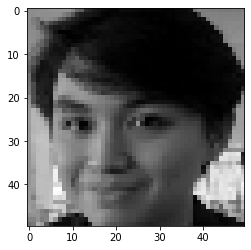

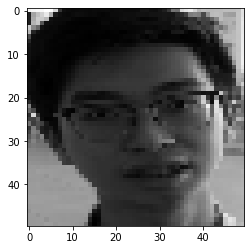

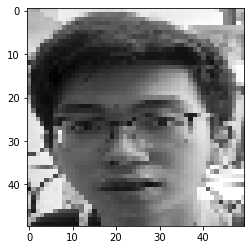

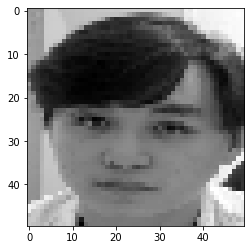

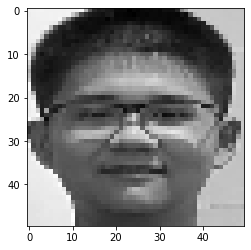

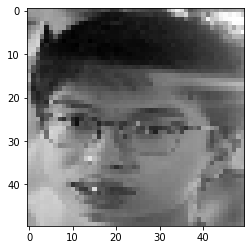

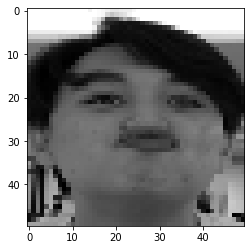

In [67]:
import glob
import os

Faces_harambee =[]

# Visualize some examples of resize image
for k,i in enumerate(glob.glob(r"FaceData_Members/*")):
    
    # load image
    imagei = image.imread(i)
#     print("age:",os.path.basename(i).split("_")[0])
#     print("gender:",os.path.basename(i).split("_")[1]) #male 0, female 1
#     Ages.append(os.path.basename(i).split("_")[0])
#     Genders.append(os.path.basename(i).split("_")[1])
    
    # Convert to grayscale images
    imagei = color.rgb2gray(imagei)
    
    # Resize image
    image_rescaled = rescale(imagei, 0.25, anti_aliasing=False)

    # Visualize them
    plt.figure()
    plt.imshow(image_rescaled, cmap='gray')
    plt.show()
    
    Faces_harambee.append(image_rescaled.flatten())
    
  

In [69]:
D_member = np.array(Faces_harambee).astype(float)

print(x_member.shape)

(20, 2500)


In [70]:
D_member_mean = np.mean(D_member,axis=0)[None,:]
D_member_demean = D_member- D_member_mean

In [75]:
print(W_gender.shape)
print(D_member_demean.shape)
y_pred = D_member_demean @ W_gender
print(y_pred)

(2500,)
(20, 2500)
[ 0.48349366  0.49065594 -0.1412922   1.34082225  0.30148036  0.95887998
 -1.84559453 -1.27198904 -3.41567913  3.52210032 -2.56512011  0.02964282
 -0.0113598   0.04252005  1.6466526  -0.44901992 -0.48451028  1.26450095
  1.51543638 -1.4116203 ]


In [76]:
y_pred = W_age @ D_member.T

print(y_pred)

NameError: name 'W_age' is not defined

In [ ]:
C = np.cov(D_input.T)

# eigendecomposition and SVD

In [ ]:
y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)
print(mean_squared_error(y_test,y_pred_test))

# ANN Approach

In [ ]:
# sgd gradient descent (gender)

In [ ]:
y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)
print(y_test>0,y_pred_test[:,0]>0)
print(y_test,y_pred_test[:,0])
print("Accuracy:",np.sum(np.sign(y_gender_test)==np.sign(y_pred_test[:,0]))/y_gender_test.shape[0])

In [ ]:
y_pred_test,_,_ = predict(X_test_whitten_reduced, W_hidden,W_output)
print(mean_squared_error(y_train,y_pred))
    

# Hints using Iris data

In [ ]:
# # import data
# iris = datasets.load_iris()

# # extract the first two columns
# X = iris.data[:, :3]
# y = iris.data[:, 3]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=205) # 70% training and 30% test


In [ ]:
# class LinearRegression:
#     def __init__(self):
#         self.coef_ = None
#         self.intercept_ = None
#         self._theta = None
    
#     def fit(self, X, y):
#         # Add bias term to the features
#         bias = np.ones((X.shape[0], 1))
#         X = np.concatenate((bias, X), axis=1)
#         print(X.shape)
#         # Initialize theta to zero
#         self._theta = np.zeros(X.shape[1])
#         print(self._theta.shape)
#         # Perform gradient descent to learn theta
#         self._gradient_descent(X, y)
    
#     def _gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
#         for i in range(n_iters):
#             # Compute predictions
#             y_pred = X.dot(self._theta)
            
#             # Compute mean squared error
#             mse = self._mean_squared_error(y, y_pred)
            
#             # Compute the gradients
#             gradients = self._mean_gradient(X, y, y_pred)
            
#             # Update theta
#             self._theta -= learning_rate * gradients
#             print(self._mean_squared_error(y_train, y_pred))
            
#     def _mean_squared_error(self, y, y_pred):
#         return np.mean((y - y_pred) ** 2)
    
#     def _mean_gradient(self, X, y, y_pred):
#         return (2/X.shape[0]) * X.T.dot(y_pred - y)
    
#     def predict(self, X):
#         # Add bias term to the features
#         bias = np.ones((X.shape[0], 1))
#         X = np.concatenate((bias, X), axis=1)
        
#         return X@self._theta

In [ ]:
# model = LinearRegression()

# # Fit the model to the training data

# model.fit(X_train_whitten_reduced, y_train)

# # Predict the labels for the test data

# y_pred = model.predict(X_test_whitten_reduced)
# print(model.coef)
# print(y_pred.shape)

# print

In [ ]:
X_test_whitten_reduced.shape